In [1]:
import os
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print('Total %s data email'% len(df))

Total 5171 data email


In [6]:
#total class memebers
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

C:\Users\Sanika\AppData\Local\Temp\ipykernel_24704\292895650.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  df_label.set_xticklabels(df['label'].unique())


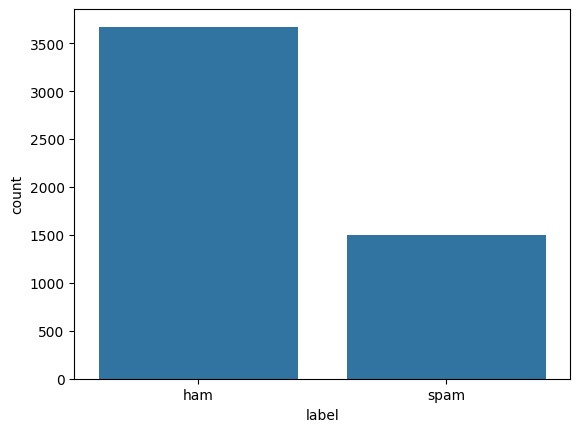

In [7]:
# Create the countplot
df_label = sns.countplot(x='label', data=df)

# Set xticklabels to ensure they match the unique labels
df_label.set_xticklabels(df['label'].unique())

# Show the plot
plt.show()


In [8]:
#data preprocessing
#data text cleaning
# punchuations
punct = []
for char in string.punctuation:
    punct.append(char)
 
    import re
    
def cleaning(txt):
    # case folding
    text = txt.lower()
    
    # remove multiple space, tabs, dan newlines
    text = re.sub('\s+',' ',text)    
    # remove links
    text = text.replace("http://", " ").replace("https://", " ")    
    # remove special characters
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())    
    # remove punctuation
    text = ''.join([word for word in text if word not in punct])    
    #remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)    
    #remove numbers
    text = re.sub(r"\d+", "", text)    
    #remove multiple spaces (again)
    text = re.sub('\s+',' ',text)    
    return text

In [9]:
# call function for cleaning
    # apply fungsi cleaning ke setiap text
df['text_cleaned'] = df['text'].apply(lambda x: cleaning(x))
df = df[['text', 'text_cleaned', 'label']]
df.head()

,text,text_cleaned,label
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter this is follow up...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january see attached file ...,ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho we re around to ...,ham
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...,spam
4,Subject: re : indian springs\r\nthis deal is t...,subject re indian springs this deal is to book...,ham


In [10]:
#compare
print(df['text'][0])
print(df['text_cleaned'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
subject enron methanol meter this is follow up to the note gave you on monday preliminary flow data provided by daren please override pop daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes 


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Call function for cleaning
if 'text' in df.columns:
    df['text_cleaned'] = df['text'].apply(lambda x: cleaning(x))
    print("Text cleaned column created.")
else:
    print("Column 'text' not found in the dataframe.")

# Check if 'text_cleaned' exists before proceeding
print(df.columns)  # This will show the available columns

# Ensure the column exists before applying stopwords removal
if 'text_cleaned' in df.columns:
    stop = stopwords.words('english')
    df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
    print("Stopwords removed.")
else:
    print("Column 'text_cleaned' not found in the dataframe.")


Text cleaned column created.
Index(['text', 'text_cleaned', 'label'], dtype='object')
Stopwords removed.


In [13]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [14]:
def do_lemma(string):
    lemmatized = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(string)])
    return lemmatized

In [15]:
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: do_lemma(x))

In [16]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])

In [17]:
# Target variable
y = df['label']

In [18]:
# K-Nearest Neighbors Classification
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Defining the classifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure 'text' and 'label' columns are available
print(df.columns)  # Should show 'text' and 'label'

# Step 1: Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])  # 'text' is the cleaned text

# Step 2: Target variable (labels)
y = df['label']

# Step 3: Splitting the data (make sure y is defined first)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can use X_train, X_test, y_train, y_test in the model

# Step 4: K-Nearest Neighbors Classification
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Defining the classifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Training
t0 = time()
clf.fit(X_train, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")

# Predicting the time of testing
t1 = time()
pred = clf.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s\n")

# Calculating and printing the accuracy of the algorithm
print("Accuracy of KNN Algorithm: ", accuracy_score(pred, y_test))


Index(['text', 'text_cleaned', 'label'], dtype='object')

Training time: 0.005 s

Predicting time: 0.339 s

Accuracy of KNN Algorithm:  0.9468599033816425
